In [22]:
import numpy as np
import pandas as pd

# import plotnine
from plotnine import ggplot, aes, geom_line, geom_point, geom_errorbar, facet_wrap, position_dodge, theme

In [23]:
regression = pd.read_csv("claim_1_1_regression.csv")
display(regression)

,task,dataset,boot_iter,algorithm,scoring,n_leaves,max_leaves,regularization,train_score,test_score,train_wall_time,test_wall_time,train_cpu_time,test_cpu_time,tunning_wall_time,tunning_cpu_time
0,regression,friedman1,0,DT,R2,1,2,None,0.364531,0.069692,0.000284,0.000091,0.000373,0.000091,NaN,NaN
1,regression,friedman1,0,CCP,R2,2,2,2.633390946849792,0.473139,0.202923,0.000510,0.000087,0.000510,0.000087,0.071926,0.072079
2,regression,friedman1,0,HS (CART),R2,1,2,50.0,0.337318,0.125021,0.000098,0.000083,0.000098,0.000084,0.006785,0.006785
3,regression,friedman1,0,HS (CART-CCP),R2,2,2,0.1,0.473138,0.203193,0.000113,0.000087,0.000114,0.000088,0.569273,0.569401
4,regression,friedman1,0,DT,R2,3,4,None,0.575894,0.202559,0.000281,0.000086,0.000281,0.000086,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,regression,abalone,2,HS (CART-CCP),R2,29,28,0.1,0.591218,0.360701,0.000475,0.000199,0.000475,0.000200,119.470351,119.468682
2112,regression,abalone,2,DT,R2,29,30,None,0.585556,0.460882,0.004412,0.000191,0.004412,0.000192,NaN,NaN
2113,regression,abalone,2,CCP,R2,30,30,0.039320047388323676,0.595025,0.359649,0.013293,0.000194,0.013287,0.000194,16.284207,16.283863
2114,regression,abalone,2,HS (CART),R2,29,30,50.0,0.576161,0.483651,0.000467,0.000185,0.000467,0.000185,0.064163,0.064156


In [24]:
# for each bootstrap sample who was the best second best
best_regr = pd.pivot_table(regression, values='test_score', index = ["dataset", "boot_iter", "max_leaves"], columns=['algorithm']).reset_index().drop(["boot_iter"], axis = 1)
regr_rank = []
for i, row in best_regr.iterrows():
    row_dict = row.drop(["dataset", "max_leaves"]).to_dict()
    regr_rank.append([k for k, v in sorted(row_dict.items(), key=lambda item: -item[1])])

In [25]:
def plot_fig_4(res):
    res = res.copy()

    res_group = res.drop(["regularization", "max_leaves", "boot_iter", "train_wall_time", "test_wall_time", "train_cpu_time", "test_cpu_time", "tunning_wall_time", "tunning_cpu_time"], axis = 1).groupby(["task", "dataset", "algorithm", "scoring", "n_leaves"])
    res_mu = res_group.mean()
    res_mu.columns = ["train_mu", "test_mu"]
    res_std = res_group.std()
    res_std.columns = ["train_std", "test_std"]
    res = res_mu.join(res_std)
    res["test_min"] = res["test_mu"] - res["test_std"]
    res["test_max"] = res["test_mu"] + res["test_std"]
    res["train_min"] = res["train_mu"] - res["train_std"]
    res["train_max"] = res["train_mu"] + res["train_std"]
    res = res.reset_index()

    g = (ggplot(res, aes(x="n_leaves", y="test_mu", color="algorithm")) + 
         geom_line() +
         geom_errorbar(aes(ymin="test_min", ymax="test_max"), width=.2,
                     position=position_dodge(0.05)) +
         facet_wrap("dataset", scales = "free") +
         theme(subplots_adjust={'wspace':0.8}) +
         theme(figure_size=(16, 8))
         )

    display(g)



/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_errorbar : Removed 30 rows containing missing values.


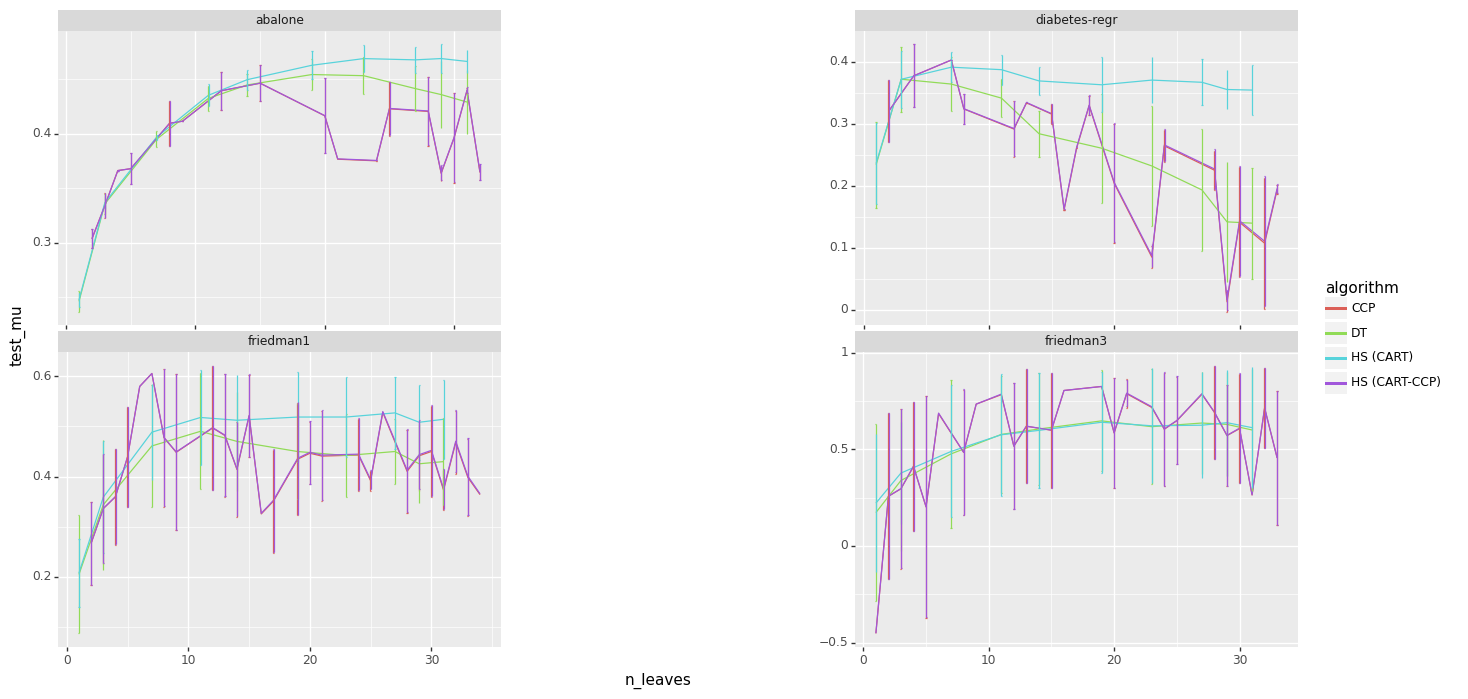

<ggplot: (8790382862487)>

In [26]:
plot_fig_4(regression)

,task,dataset,boot_iter,algorithm,scoring,n_leaves,max_leaves,regularization,train_score,test_score,train_wall_time,test_wall_time,train_cpu_time,test_cpu_time,tunning_wall_time,tunning_cpu_time
0,classification,heart,0,DT,AUC,1,2,None,0.788750,0.680000,0.000501,0.000198,0.000500,0.000199,NaN,NaN
1,classification,heart,0,CCP,AUC,2,2,0.044453262786596115,0.777500,0.682500,0.000529,0.000144,0.000530,0.000144,0.009669,0.009870
2,classification,heart,0,HS (CART),AUC,1,2,0.1,0.788750,0.680000,0.000097,0.000094,0.000097,0.000095,0.012481,0.012480
3,classification,heart,0,HS (CART-CCP),AUC,2,2,0.1,0.777500,0.682500,0.000106,0.000094,0.000106,0.000095,0.098170,0.098170
4,classification,heart,0,DT,AUC,3,4,None,0.848750,0.752500,0.000307,0.000093,0.000307,0.000093,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,classification,recidivism,9,HS (CART-CCP),AUC,30,30,0.1,0.697707,0.678351,0.000447,0.000355,0.000447,0.000356,40.975917,40.974998
9596,classification,recidivism,9,DT,AUC,31,32,None,0.701322,0.674796,0.003548,0.000351,0.003548,0.000351,NaN,NaN
9597,classification,recidivism,9,CCP,AUC,35,32,0.000685502782938982,0.702882,0.675927,0.009101,0.000361,0.009102,0.000362,5.491045,5.490988
9598,classification,recidivism,9,HS (CART),AUC,31,32,100.0,0.702033,0.679678,0.000453,0.000349,0.000453,0.000350,0.064016,0.064011


/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'
/home/bro/anaconda3/envs/mlds/lib/python3.10/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_errorbar : Removed 36 rows containing missing values.


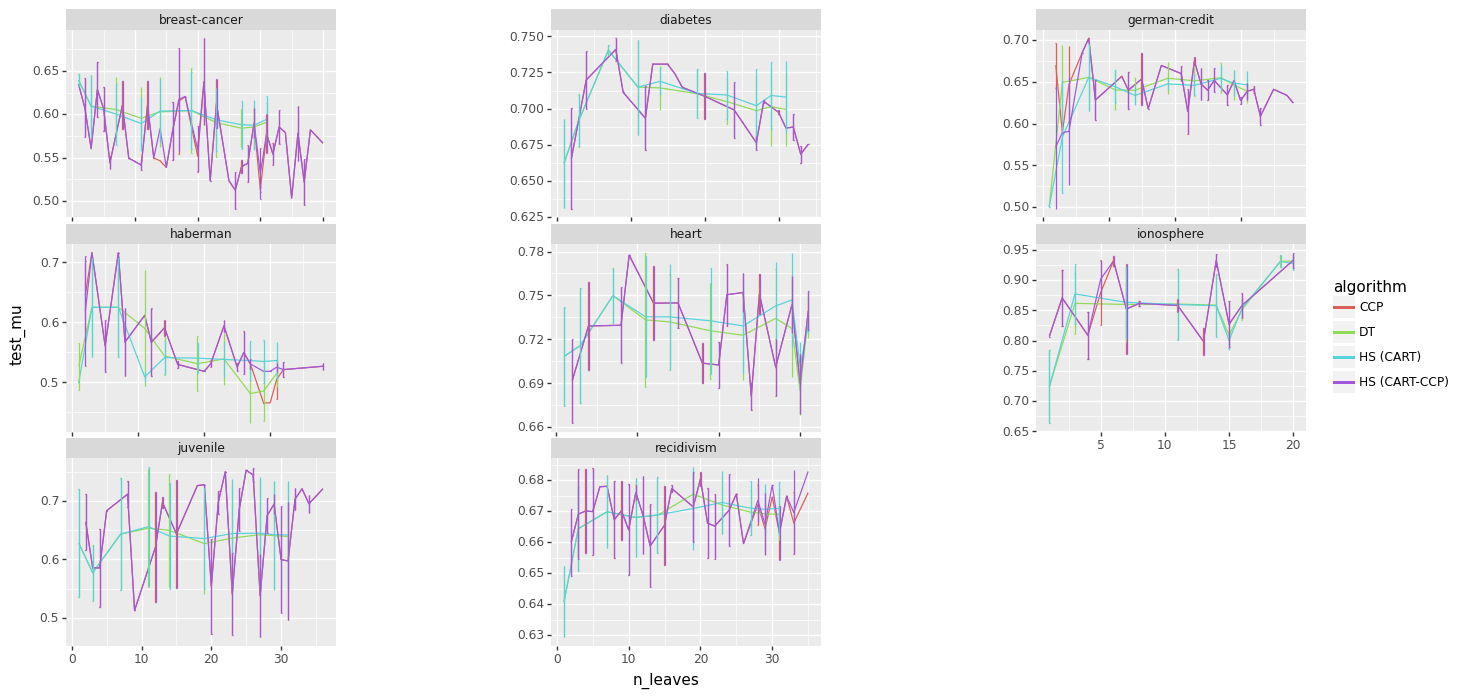

<ggplot: (8790377565130)>

In [27]:
classification = pd.read_csv("claim_1_1_classification.csv")
display(classification)

plot_fig_4(classification)